In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True) # drop Name, Ticket, Cabin columns
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True) # replace index with PassengerId

test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(), 'Embarked': test_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

In [17]:
X_train_split = train_data.loc[:, train_data.columns != 'Survived']
y_train_split = train_data.loc[:, 'Survived']

print(X_train_split.head())
print(y_train_split.head())

             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
1                 3    0  22.0      1      0   7.2500         2
2                 1    1  38.0      1      0  71.2833         0
3                 3    1  26.0      0      0   7.9250         2
4                 1    1  35.0      1      0  53.1000         2
5                 3    0  35.0      0      0   8.0500         2
PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


In [27]:
# NOT USED
kf = KFold(n_splits=5, shuffle=True, random_state=10)
model = RandomForestClassifier()

avg_fpr = 0
avg_fnr = 0

for train_index, test_index in kf.split(X_train_split):
    X_train, X_test = X_train_split.iloc[train_index,:], X_train_split.iloc[test_index,:]
    y_train, y_test = y_train_split.iloc[train_index], y_train_split.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    
    avg_fpr += fpr / 5
    avg_fnr += fnr / 5
    
    print(f"FPR: {fpr}", f"FNR: {fnr}")
    
print(f"Average FPR: {avg_fpr}", f"Average FNR: {avg_fnr}")

FPR: 0.15384615384615385 FNR: 0.22580645161290322
FPR: 0.14285714285714285 FNR: 0.30303030303030304
FPR: 0.1792452830188679 FNR: 0.19444444444444445
FPR: 0.1388888888888889 FNR: 0.38571428571428573
FPR: 0.1320754716981132 FNR: 0.25
Average FPR: 0.14938258806183335 Average FNR: 0.2717990969603873


In [36]:
# NOT USED
kf = KFold(n_splits=5, shuffle=True, random_state=10)
model = GradientBoostingClassifier()

avg_fpr = 0
avg_fnr = 0

for train_index, test_index in kf.split(X_train_split):
    X_train, X_test = X_train_split.iloc[train_index,:], X_train_split.iloc[test_index,:]
    y_train, y_test = y_train_split.iloc[train_index], y_train_split.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    
    avg_fpr += fpr / 5
    avg_fnr += fnr / 5
    
    print(f"FPR: {fpr}", f"FNR: {fnr}")
    
print(f"Average FPR: {avg_fpr}", f"Average FNR: {avg_fnr}")

FPR: 0.1111111111111111 FNR: 0.24193548387096775
FPR: 0.13392857142857142 FNR: 0.30303030303030304
FPR: 0.14150943396226415 FNR: 0.2361111111111111
FPR: 0.09259259259259259 FNR: 0.4
FPR: 0.09433962264150944 FNR: 0.2916666666666667
Average FPR: 0.11469626634720972 Average FNR: 0.29454871293580975


In [39]:
# NOT USED
kf = KFold(n_splits=5, shuffle=True, random_state=10)
model = SGDClassifier(max_iter=5, tol=None)

avg_fpr = 0
avg_fnr = 0

for train_index, test_index in kf.split(X_train_split):
    X_train, X_test = X_train_split.iloc[train_index,:], X_train_split.iloc[test_index,:]
    y_train, y_test = y_train_split.iloc[train_index], y_train_split.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    
    avg_fpr += fpr / 5
    avg_fnr += fnr / 5
    
    print(f"FPR: {fpr}", f"FNR: {fnr}")
    
print(f"Average FPR: {avg_fpr}", f"Average FNR: {avg_fnr}")

FPR: 0.11965811965811966 FNR: 0.4032258064516129
FPR: 0.7767857142857143 FNR: 0.5151515151515151
FPR: 0.05660377358490566 FNR: 0.6388888888888888
FPR: 0.046296296296296294 FNR: 0.7714285714285715
FPR: 0.25471698113207547 FNR: 0.2361111111111111
Average FPR: 0.2508121769914223 Average FNR: 0.5129611786063399


In [46]:
# USED
kf = KFold(n_splits=5, shuffle=True, random_state=10)
model = Perceptron(max_iter=5)

avg_fpr = 0
avg_fnr = 0

for train_index, test_index in kf.split(X_train_split):
    X_train, X_test = X_train_split.iloc[train_index,:], X_train_split.iloc[test_index,:]
    y_train, y_test = y_train_split.iloc[train_index], y_train_split.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    
    avg_fpr += fpr / 5
    avg_fnr += fnr / 5
    
    print(f"FPR: {fpr}", f"FNR: {fnr}")
    
print(f"Average FPR: {avg_fpr}", f"Average FNR: {avg_fnr}")

FPR: 0.0 FNR: 1.0
FPR: 0.0 FNR: 1.0
FPR: 0.22641509433962265 FNR: 0.5
FPR: 0.0 FNR: 1.0
FPR: 0.1320754716981132 FNR: 0.5833333333333334
Average FPR: 0.07169811320754718 Average FNR: 0.8166666666666667


/Users/chettrich/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/chettrich/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/chettrich/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/chettrich/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: Con

In [47]:
test_predictions = model.predict(test_data)
output = pd.DataFrame({"PassengerID": test_data.index, "Survived": test_predictions})
output.to_csv("submission.csv", index = False)

In [8]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train.values, y_train.values)
y_pred = random_forest.predict(X_test.values)
y_truth = y_test.values

random_forest.score(X_train.values, y_train.values)

acc_random_forest = round(random_forest.score(X_train.values, y_train.values) * 100, 2)
print(round(acc_random_forest,2,), "%")
y_pred

98.46 %


array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

In [9]:
# OOB Score is the out-of-bag samples to estimate the generalization accuracy.
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.36 %


In [10]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train.values, y_train.values, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79166667 0.73611111 0.75       0.83098592 0.83098592 0.8028169
 0.83098592 0.77464789 0.84507042 0.83098592]
Mean: 0.8024256651017214
Standard Deviation: 0.036214515639419895


In [11]:
# # Support Vector Machine
# svm_clf = svm.SVC(kernel='linear')
# svm_clf.fit(X_train.values, y_train.values)
# print(svm_clf.score(X_test.values, y_test.values))
# y_pred = svm_clf.predict(X_test.values)
# y_truth = y_test.values
# y_pred

In [12]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
predictions
confusion_matrix(y_train, predictions)
tn, fp, fn, tp = confusion_matrix(y_train, predictions).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_train, predictions, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)
fpr = fp/(fp + tn)
fnr = fn/(fn + tp)
print(fpr)
print(fnr)

Confusion Matrix
[[381  62]
 [ 84 186]]

True Negatives 381
False Positives 62
False Negatives 84
True Positives 186
0.1399548532731377
0.3111111111111111


In [40]:
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.744
Recall: 0.6888888888888889


Confusion matrix, without normalization
[[381  62]
 [ 84 186]]


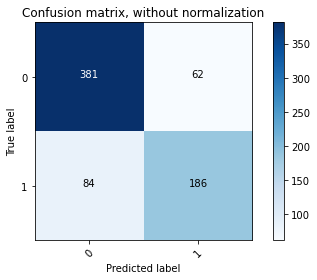

In [48]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, predictions)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [50]:
predictions = random_forest.predict(test_data.values)

In [51]:
type(predictions)

numpy.ndarray

In [52]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [53]:
pred_df.to_csv('random_forest_predictions.csv', header=True, sep=',')